I want to perform an exploratory data analysis on trading and user activity data released from Robinhood. 

# Data Ingestion

Import Python libraries for data analysis

In [1]:
#Numerical Analysis Package
import numpy as np
#Data Science Package
import pandas as pd
#Data Visualization
import matplotlib.pyplot as plt
#Mass File Importation
import glob
#OS Indpendence Package
import os
#Regular Expressions Package
import re
#Import Math Package
import math
import statsmodels
import functools
import yfinance as yf

Create a list with the location of the 10 csvs

In [2]:
#.os.path.join allows for OS independence
files = glob.glob(os.path.join('TenStocks','*.csv',))

#verification that all files are in the list
print(files)

['TenStocks\\AAL.csv', 'TenStocks\\AAPL.csv', 'TenStocks\\AMD.csv', 'TenStocks\\BAC.csv', 'TenStocks\\BANF.csv', 'TenStocks\\FB.csv', 'TenStocks\\GOOG.csv', 'TenStocks\\JPM.csv', 'TenStocks\\TSLA.csv', 'TenStocks\\TWTR.csv']


Create a list with the names of the tickers from the list of files (these will be labels)

In [3]:
filenames = []

for file in files:
    filenames.append(re.split(r"/|\\|\.",file)[1])
filenames.insert(0,'timestamp')
    
#Verification that all labels are in the list properly.
print(filenames)

['timestamp', 'AAL', 'AAPL', 'AMD', 'BAC', 'BANF', 'FB', 'GOOG', 'JPM', 'TSLA', 'TWTR']


Read the CSV's into DataFrames and attach the appropriate label

In [4]:
AAL = pd.read_csv('TenStocks\\AAL.csv')
AAPL = pd.read_csv('TenStocks\\AAPL.csv')
AMD = pd.read_csv('TenStocks\\AMD.csv')
BAC = pd.read_csv('TenStocks\\BAC.csv')
BANF = pd.read_csv('TenStocks\\BANF.csv')
FB = pd.read_csv('TenStocks\\FB.csv')
GOOG = pd.read_csv('TenStocks\\GOOG.csv')
JPM = pd.read_csv('TenStocks\\JPM.csv')
TSLA = pd.read_csv('TenStocks\\TSLA.csv')
TWTR = pd.read_csv('TenStocks\\TWTR.csv')

mergedf1 = pd.merge(AAL, AAPL, on='timestamp', how='outer')
mergedf2 = pd.merge(mergedf1, AMD, on='timestamp', how='outer')
mergedf3 = pd.merge(mergedf2, BAC, on='timestamp', how='outer')
mergedf4 = pd.merge(mergedf3, BANF, on='timestamp', how='outer')
mergedf5 = pd.merge(mergedf4, FB, on='timestamp', how='outer')
mergedf6 = pd.merge(mergedf5, GOOG, on='timestamp', how='outer')
mergedf7 = pd.merge(mergedf6, JPM, on='timestamp', how='outer')
mergedf8 = pd.merge(mergedf7, TSLA, on='timestamp', how='outer')
merged = pd.merge(mergedf8, TWTR, on='timestamp', how='outer')

print(merged)

               timestamp     AAL  AAPL  AMD      BAC  BANF  FB  GOOG  JPM  \
0        2018-05-02 4:55  3755.0   NaN  NaN      NaN   NaN NaN   NaN  NaN   
1        2018-05-02 6:41  3755.0   NaN  NaN  78404.0   NaN NaN   NaN  NaN   
2        2018-05-03 0:38  3776.0   NaN  NaN  78441.0   NaN NaN   NaN  NaN   
3        2018-05-03 6:36  3776.0   NaN  NaN  78441.0   NaN NaN   NaN  NaN   
4        2018-05-03 6:51  3776.0   NaN  NaN  78441.0   NaN NaN   NaN  NaN   
...                  ...     ...   ...  ...      ...   ...  ..   ...  ...   
104816  2020-08-12 12:47     NaN   NaN  NaN      NaN   NaN NaN   NaN  NaN   
104817  2020-08-12 14:47     NaN   NaN  NaN      NaN   NaN NaN   NaN  NaN   
104818   2020-08-13 4:52     NaN   NaN  NaN      NaN   NaN NaN   NaN  NaN   
104819  2020-08-13 12:55     NaN   NaN  NaN      NaN   NaN NaN   NaN  NaN   
104820  2020-08-13 13:57     NaN   NaN  NaN      NaN   NaN NaN   NaN  NaN   

        TSLA      TWTR  
0        NaN       NaN  
1        NaN       NaN  


## Result

We have a dataframe with all the user activity for the stocks we're looking at in a merged dataFrame separated by column and we have a list of our tickers in a variable called filenames if we drop the zero element 'timestamp'.

The numbers represent the number of robinhood holders of a specific company at a specifc date and time.

## Data Exploration

In [5]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104821 entries, 0 to 104820
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  104821 non-null  object 
 1   AAL        19758 non-null   float64
 2   AAPL       19854 non-null   float64
 3   AMD        19837 non-null   float64
 4   BAC        19751 non-null   float64
 5   BANF       19883 non-null   float64
 6   FB         19789 non-null   float64
 7   GOOG       19830 non-null   float64
 8   JPM        19882 non-null   float64
 9   TSLA       19870 non-null   float64
 10  TWTR       19834 non-null   float64
dtypes: float64(10), object(1)
memory usage: 9.6+ MB


### Convert 'timestamp' column to datetime format and sort DataFrame

In [6]:
merged['timestamp'] = pd.to_datetime(merged['timestamp'])
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104821 entries, 0 to 104820
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   timestamp  104821 non-null  datetime64[ns]
 1   AAL        19758 non-null   float64       
 2   AAPL       19854 non-null   float64       
 3   AMD        19837 non-null   float64       
 4   BAC        19751 non-null   float64       
 5   BANF       19883 non-null   float64       
 6   FB         19789 non-null   float64       
 7   GOOG       19830 non-null   float64       
 8   JPM        19882 non-null   float64       
 9   TSLA       19870 non-null   float64       
 10  TWTR       19834 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 9.6 MB


In [7]:
rhdata = merged.sort_values(by='timestamp')
rhdata.reset_index(drop=True, inplace=True)
print(rhdata)

                 timestamp       AAL      AAPL       AMD       BAC   BANF  \
0      2018-05-02 04:51:00       NaN       NaN       NaN       NaN    NaN   
1      2018-05-02 04:53:00       NaN  150785.0       NaN       NaN   11.0   
2      2018-05-02 04:54:00       NaN       NaN  128212.0       NaN    NaN   
3      2018-05-02 04:55:00    3755.0       NaN       NaN       NaN    NaN   
4      2018-05-02 04:56:00       NaN       NaN       NaN   78404.0    NaN   
...                    ...       ...       ...       ...       ...    ...   
104816 2020-08-13 22:48:00       NaN       NaN       NaN       NaN    NaN   
104817 2020-08-13 22:54:00       NaN       NaN       NaN       NaN  208.0   
104818 2020-08-13 22:55:00       NaN  730774.0  264849.0       NaN    NaN   
104819 2020-08-13 22:58:00  637705.0       NaN       NaN       NaN    NaN   
104820 2020-08-13 23:00:00       NaN       NaN       NaN  359999.0    NaN   

              FB     GOOG      JPM      TSLA      TWTR  
0            NaN  

In [8]:
rhdata.to_csv('RobinHoodMerged.csv')

### Test Graph - Verify Chart
I was curious to see the number of users in Robinhood holding a share of a company's stock.

Text(0, 0.5, 'Users Holding')

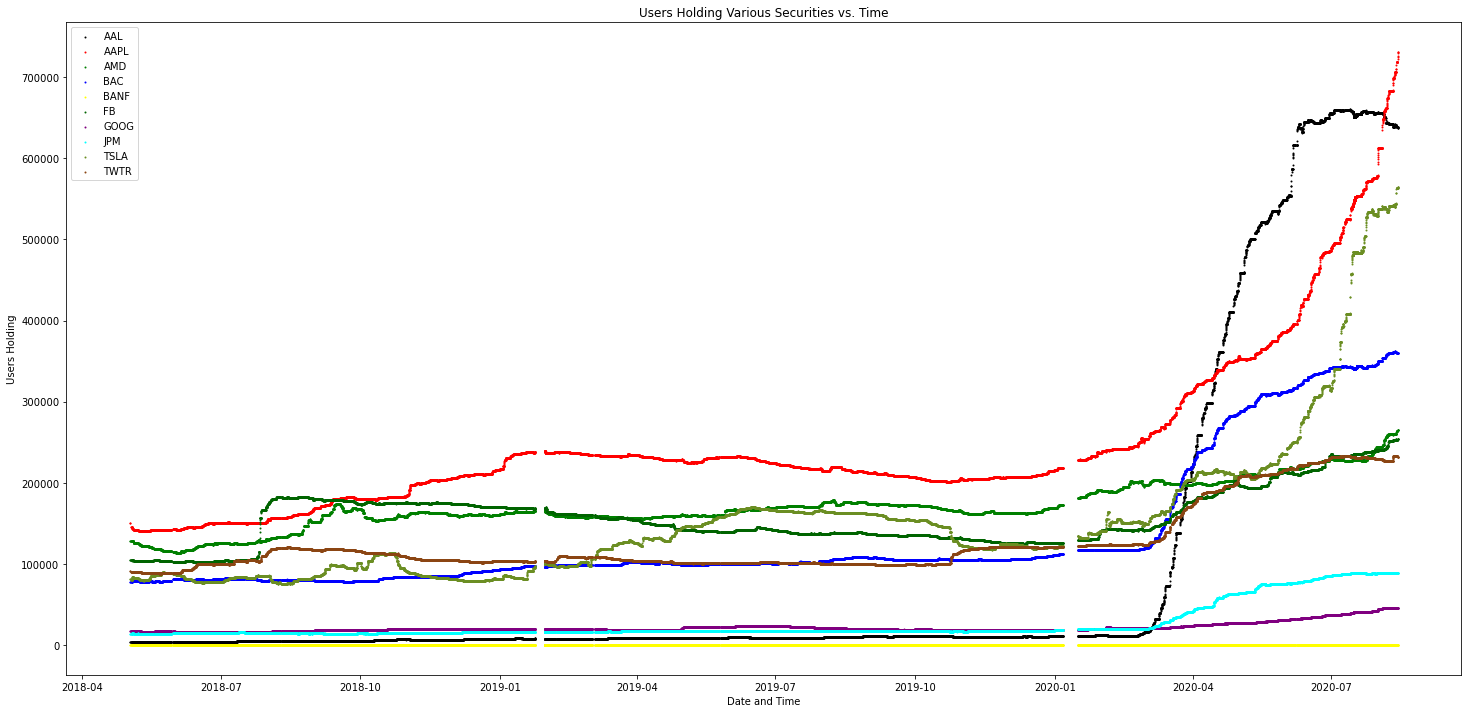

In [9]:
ax = rhdata.plot.scatter(x='timestamp', y='AAL', s=1,c='black', figsize=(25,12), label = 'AAL', title = "Users Holding Various Securities vs. Time")
rhdata.plot.scatter(x='timestamp', y='AAPL',s=1,c='red', label = 'AAPL', ax=ax)
rhdata.plot.scatter(x='timestamp', y='AMD',s=1,c='green', label = 'AMD', ax=ax)
rhdata.plot.scatter(x='timestamp', y='BAC',s=1,c='blue', label = 'BAC', ax=ax)
rhdata.plot.scatter(x='timestamp', y='BANF',s=1,c='yellow', label = 'BANF', ax=ax)
rhdata.plot.scatter(x='timestamp', y='FB',s=1,c='darkgreen', label = 'FB', ax=ax)
rhdata.plot.scatter(x='timestamp', y='GOOG',s=1,c='purple', label = 'GOOG', ax=ax)
rhdata.plot.scatter(x='timestamp', y='JPM',s=1,c='cyan', label = 'JPM', ax=ax)
rhdata.plot.scatter(x='timestamp', y='TSLA',s=1,c='olivedrab', label = 'TSLA', ax=ax)
rhdata.plot.scatter(x='timestamp', y='TWTR',s=1,c='saddlebrown', label = 'TWTR', ax=ax)
ax.set_xlabel("Date and Time")
ax.set_ylabel("Users Holding")

# Stock Analysis

## Company Specific DataFrames

In [10]:
rhdatatime = rhdata

In [11]:
rhdatatime['timestamp'] = rhdatatime.timestamp.dt.ceil(freq='D')

In [12]:
AALrhdata = rhdatatime[['timestamp','AAL']].copy()
AALrhdata = AALrhdata.dropna()
AALrhdata.reset_index(drop=True, inplace=True)
AAPLrhdata = rhdatatime[['timestamp','AAPL']].copy()
AAPLrhdata = AAPLrhdata.dropna()
AAPLrhdata.reset_index(drop=True, inplace=True)
AMDrhdata = rhdatatime[['timestamp','AMD']].copy()
AMDrhdata = AMDrhdata.dropna()
AMDrhdata.reset_index(drop=True, inplace=True)
BACrhdata = rhdatatime[['timestamp','BAC']].copy()
BACrhdata = BACrhdata.dropna()
BACrhdata.reset_index(drop=True, inplace=True)
BANFrhdata = rhdatatime[['timestamp','BANF']].copy()
BANFrhdata = BANFrhdata.dropna()
BANFrhdata.reset_index(drop=True, inplace=True)
FBrhdata = rhdatatime[['timestamp','FB']].copy()
FBrhdata = FBrhdata.dropna()
FBrhdata.reset_index(drop=True, inplace=True)
GOOGrhdata = rhdatatime[['timestamp','GOOG']].copy()
GOOGrhdata = GOOGrhdata.dropna()
GOOGrhdata.reset_index(drop=True, inplace=True)
JPMrhdata = rhdatatime[['timestamp','JPM']].copy()
JPMrhdata = JPMrhdata.dropna()
JPMrhdata.reset_index(drop=True, inplace=True)
TSLArhdata = rhdatatime[['timestamp','TSLA']].copy()
TSLArhdata = TSLArhdata.dropna()
TSLArhdata.reset_index(drop=True, inplace=True)
TWTRrhdata = rhdatatime[['timestamp','TWTR']].copy()
TWTRrhdata = TWTRrhdata.dropna()

In [13]:
AALrhdata 

,timestamp,AAL
0,2018-05-03,3755.0
1,2018-05-03,3755.0
2,2018-05-04,3776.0
3,2018-05-04,3776.0
4,2018-05-04,3776.0
...,...,...
19753,2020-08-14,638430.0
19754,2020-08-14,638246.0
19755,2020-08-14,637734.0
19756,2020-08-14,637706.0


# Get only the number of users at the end of each day

In [14]:
AALrhdata['MaxUsers'] = AALrhdata.groupby('timestamp')['AAL'].transform('max')
AALrhdata.drop(['AAL'], axis=1, inplace=True)
AALrhdata.drop_duplicates(inplace=True)
AALrhdata.reset_index(drop=True, inplace=True)
AAPLrhdata['MaxUsers'] = AAPLrhdata.groupby('timestamp')['AAPL'].transform('max')
AAPLrhdata.drop(['AAPL'], axis=1, inplace=True)
AAPLrhdata.drop_duplicates(inplace=True)
AAPLrhdata.reset_index(drop=True, inplace=True)
AMDrhdata['MaxUsers'] = AMDrhdata.groupby('timestamp')['AMD'].transform('max')
AMDrhdata.drop(['AMD'], axis=1, inplace=True)
AMDrhdata.drop_duplicates(inplace=True)
AMDrhdata.reset_index(drop=True, inplace=True)
BACrhdata['MaxUsers'] = BACrhdata.groupby('timestamp')['BAC'].transform('max')
BACrhdata.drop(['BAC'], axis=1, inplace=True)
BACrhdata.drop_duplicates(inplace=True)
BACrhdata.reset_index(drop=True, inplace=True)
BANFrhdata['MaxUsers'] = BANFrhdata.groupby('timestamp')['BANF'].transform('max')
BANFrhdata.drop(['BANF'], axis=1, inplace=True)
BANFrhdata.drop_duplicates(inplace=True)
BANFrhdata.reset_index(drop=True, inplace=True)
FBrhdata['MaxUsers'] = FBrhdata.groupby('timestamp')['FB'].transform('max')
FBrhdata.drop(['FB'], axis=1, inplace=True)
FBrhdata.drop_duplicates(inplace=True)
FBrhdata.reset_index(drop=True, inplace=True)
GOOGrhdata['MaxUsers'] = GOOGrhdata.groupby('timestamp')['GOOG'].transform('max')
GOOGrhdata.drop(['GOOG'], axis=1, inplace=True)
GOOGrhdata.drop_duplicates(inplace=True)
GOOGrhdata.reset_index(drop=True, inplace=True)
JPMrhdata['MaxUsers'] = JPMrhdata.groupby('timestamp')['JPM'].transform('max')
JPMrhdata.drop(['JPM'], axis=1, inplace=True)
JPMrhdata.drop_duplicates(inplace=True)
JPMrhdata.reset_index(drop=True, inplace=True)
TSLArhdata['MaxUsers'] = TSLArhdata.groupby('timestamp')['TSLA'].transform('max')
TSLArhdata.drop(['TSLA'], axis=1, inplace=True)
TSLArhdata.drop_duplicates(inplace=True)
TSLArhdata.reset_index(drop=True, inplace=True)
TWTRrhdata['MaxUsers'] = TWTRrhdata.groupby('timestamp')['TWTR'].transform('max')
TWTRrhdata.drop(['TWTR'], axis=1, inplace=True)
TWTRrhdata.drop_duplicates(inplace=True)
TWTRrhdata.reset_index(drop=True, inplace=True)

## Company Information Pulldown

In [15]:
AALinfo = yf.Ticker('AAL')
AAPLinfo = yf.Ticker('AAPL')
AMDinfo = yf.Ticker('AMD')
BACinfo = yf.Ticker('BAC')
BANFinfo = yf.Ticker('BANF')
FBinfo = yf.Ticker('FB')
GOOGinfo = yf.Ticker('GOOG')
JPMinfo = yf.Ticker('JPM')
TSLAinfo = yf.Ticker('TSLA')
TWTRinfo = yf.Ticker('TWTR')

## Company Historical Price and Volume Pulldown

In [16]:
from pandas_datareader import data as wb

AALstock = wb.DataReader('AAL', data_source='yahoo', start='2018-1-1',end='2020-10-1')
AAPLstock = wb.DataReader('AAPL', data_source='yahoo', start='2018-1-1',end='2020-10-1')
AMDstock = wb.DataReader('AMD', data_source='yahoo', start='2018-1-1',end='2020-10-1')
BACstock = wb.DataReader('BAC', data_source='yahoo', start='2018-1-1',end='2020-10-1')
BANFstock = wb.DataReader('BANF', data_source='yahoo', start='2018-1-1',end='2020-10-1')
FBstock = wb.DataReader('FB', data_source='yahoo', start='2018-1-1',end='2020-10-1')
GOOGstock = wb.DataReader('GOOG', data_source='yahoo', start='2018-1-1',end='2020-10-1')
JPMstock = wb.DataReader('JPM', data_source='yahoo', start='2018-1-1',end='2020-10-1')
TSLAstock = wb.DataReader('TSLA', data_source='yahoo', start='2018-1-1',end='2020-10-1')
TWTRstock = wb.DataReader('TWTR', data_source='yahoo', start='2018-1-1',end='2020-10-1')
AALstock['Date'] = AALstock.index
AAPLstock['Date'] = AAPLstock.index
AMDstock['Date'] = AMDstock.index
BACstock['Date'] = BACstock.index
BANFstock['Date'] = BANFstock.index
FBstock['Date'] = FBstock.index
GOOGstock['Date'] = GOOGstock.index
JPMstock['Date'] = JPMstock.index
TSLAstock['Date'] = TSLAstock.index
TWTRstock['Date'] = TWTRstock.index

In [17]:
AALstock

,High,Low,Open,Close,Volume,Adj Close,Date
Date,,,,,,,
2018-01-02,53.099998,51.900002,52.330002,52.990002,4084712.0,51.647564,2018-01-02
2018-01-03,52.860001,52.055000,52.860001,52.340000,5074850.0,51.014030,2018-01-03
2018-01-04,54.400002,52.264999,52.480000,52.669998,3557059.0,51.335663,2018-01-04
2018-01-05,52.838799,52.430000,52.779999,52.650002,2967756.0,51.316170,2018-01-05
2018-01-08,52.639999,51.930000,52.599998,52.130001,3515785.0,50.809349,2018-01-08
...,...,...,...,...,...,...,...
2020-09-25,12.310000,11.710000,11.760000,12.290000,43763989.0,12.290000,2020-09-25
2020-09-28,13.150000,12.490000,12.740000,12.760000,63558206.0,12.760000,2020-09-28
2020-09-29,12.660000,12.110000,12.590000,12.250000,47209575.0,12.250000,2020-09-29


## Merging Users Holding Data with Volume and Price Data

In [18]:
AALanalysis = pd.merge(AALrhdata, AALstock, left_on='timestamp', right_on='Date', right_index = True)
AALanalysis.reset_index(drop=True, inplace=True)
AALanalysis.drop(['timestamp'], axis=1, inplace=True)
AAPLanalysis = pd.merge(AAPLrhdata, AAPLstock, left_on='timestamp', right_on='Date', right_index = True)
AAPLanalysis.reset_index(drop=True, inplace=True)
AAPLanalysis.drop(['timestamp'], axis=1, inplace=True)
AMDanalysis = pd.merge(AMDrhdata, AMDstock, left_on='timestamp', right_on='Date', right_index = True)
AMDanalysis.reset_index(drop=True, inplace=True)
AMDanalysis.drop(['timestamp'], axis=1, inplace=True)
BACanalysis = pd.merge(BACrhdata, BACstock, left_on='timestamp', right_on='Date', right_index = True)
BACanalysis.reset_index(drop=True, inplace=True)
BACanalysis.drop(['timestamp'], axis=1, inplace=True)
BANFanalysis = pd.merge(BANFrhdata, BANFstock, left_on='timestamp', right_on='Date', right_index = True)
BANFanalysis.reset_index(drop=True, inplace=True)
BANFanalysis.drop(['timestamp'], axis=1, inplace=True)
FBanalysis = pd.merge(FBrhdata, FBstock, left_on='timestamp', right_on='Date', right_index = True)
FBanalysis.reset_index(drop=True, inplace=True)
FBanalysis.drop(['timestamp'], axis=1, inplace=True)
GOOGanalysis = pd.merge(GOOGrhdata, GOOGstock, left_on='timestamp', right_on='Date', right_index = True)
GOOGanalysis.reset_index(drop=True, inplace=True)
GOOGanalysis.drop(['timestamp'], axis=1, inplace=True)
JPManalysis = pd.merge(JPMrhdata, JPMstock, left_on='timestamp', right_on='Date', right_index = True)
JPManalysis.reset_index(drop=True, inplace=True)
JPManalysis.drop(['timestamp'], axis=1, inplace=True)
TSLAanalysis = pd.merge(TSLArhdata, TSLAstock, left_on='timestamp', right_on='Date', right_index = True)
TSLAanalysis.reset_index(drop=True, inplace=True)
TSLAanalysis.drop(['timestamp'], axis=1, inplace=True)
TWTRanalysis = pd.merge(TWTRrhdata, TWTRstock, left_on='timestamp', right_on='Date', right_index = True)
TWTRanalysis.reset_index(drop=True, inplace=True)
TWTRanalysis.drop(['timestamp'], axis=1, inplace=True)

## Asking the big question....

Are Robinhood Clients Making Money?

In [19]:
TWTRanalysis.to_csv('TWTR.csv')

In [20]:
AALanalysis.to_csv('AAL.csv')
AAPLanalysis.to_csv('AAPL.csv')
AMDanalysis.to_csv('AMD.csv')
BACanalysis.to_csv('BAC.csv')
BANFanalysis.to_csv('BANF.csv')
FBanalysis.to_csv('FB.csv')
GOOGanalysis.to_csv('GOOG.csv')
JPManalysis.to_csv('JPM.csv')
TSLAanalysis.to_csv('TSLA.csv')

In [21]:
AALanalysis.corr(method='pearson')

,MaxUsers,High,Low,Open,Close,Volume,Adj Close
MaxUsers,1.000000,-0.786503,-0.784923,-0.787128,-0.784457,0.763788,-0.789017
High,-0.786503,1.000000,0.997899,0.998501,0.998426,-0.657960,0.998165
Low,-0.784923,0.997899,1.000000,0.998336,0.998732,-0.681825,0.998668
Open,-0.787128,0.998501,0.998336,1.000000,0.996863,-0.672245,0.996690
Close,-0.784457,0.998426,0.998732,0.996863,1.000000,-0.669782,0.999883
Volume,0.763788,-0.657960,-0.681825,-0.672245,-0.669782,1.000000,-0.672947
Adj Close,-0.789017,0.998165,0.998668,0.996690,0.999883,-0.672947,1.000000


In [22]:
AAPLanalysis.corr(method='pearson')

,MaxUsers,High,Low,Open,Close,Volume,Adj Close
MaxUsers,1.000000,-0.601932,-0.601533,-0.602064,-0.600697,0.593713,-0.596868
High,-0.601932,1.000000,0.999590,0.999735,0.999655,-0.737582,0.999620
Low,-0.601533,0.999590,1.000000,0.999644,0.999703,-0.744275,0.999673
Open,-0.602064,0.999735,0.999644,1.000000,0.999340,-0.741239,0.999300
Close,-0.600697,0.999655,0.999703,0.999340,1.000000,-0.740689,0.999977
Volume,0.593713,-0.737582,-0.744275,-0.741239,-0.740689,1.000000,-0.738711
Adj Close,-0.596868,0.999620,0.999673,0.999300,0.999977,-0.738711,1.000000


In [23]:
AMDanalysis.corr(method='pearson')

,MaxUsers,High,Low,Open,Close,Volume,Adj Close
MaxUsers,1.000000,0.915451,0.909884,0.913820,0.911805,-0.049865,0.911805
High,0.915451,1.000000,0.998426,0.998618,0.998791,-0.091325,0.998791
Low,0.909884,0.998426,1.000000,0.998687,0.998672,-0.128434,0.998672
Open,0.913820,0.998618,0.998687,1.000000,0.997054,-0.112539,0.997054
Close,0.911805,0.998791,0.998672,0.997054,1.000000,-0.107551,1.000000
Volume,-0.049865,-0.091325,-0.128434,-0.112539,-0.107551,1.000000,-0.107551
Adj Close,0.911805,0.998791,0.998672,0.997054,1.000000,-0.107551,1.000000


In [24]:
BACanalysis.corr(method='pearson')

,MaxUsers,High,Low,Open,Close,Volume,Adj Close
MaxUsers,1.000000,-0.602027,-0.599868,-0.596777,-0.600854,0.188762,-0.522697
High,-0.602027,1.000000,0.995064,0.996050,0.995905,-0.456496,0.989332
Low,-0.599868,0.995064,1.000000,0.996022,0.996005,-0.513561,0.987110
Open,-0.596777,0.996050,0.996022,1.000000,0.991468,-0.478917,0.983708
Close,-0.600854,0.995905,0.996005,0.991468,1.000000,-0.488178,0.992358
Volume,0.188762,-0.456496,-0.513561,-0.478917,-0.488178,1.000000,-0.487158
Adj Close,-0.522697,0.989332,0.987110,0.983708,0.992358,-0.487158,1.000000


In [25]:
BANFanalysis.corr(method='pearson')

,MaxUsers,High,Low,Open,Close,Volume,Adj Close
MaxUsers,1.000000,-0.738781,-0.725525,-0.733647,-0.732782,0.385507,-0.706266
High,-0.738781,1.000000,0.996279,0.997223,0.996721,-0.224311,0.992566
Low,-0.725525,0.996279,1.000000,0.996709,0.997380,-0.237801,0.994779
Open,-0.733647,0.997223,0.996709,1.000000,0.993398,-0.226894,0.990093
Close,-0.732782,0.996721,0.997380,0.993398,1.000000,-0.234517,0.997012
Volume,0.385507,-0.224311,-0.237801,-0.226894,-0.234517,1.000000,-0.225878
Adj Close,-0.706266,0.992566,0.994779,0.990093,0.997012,-0.225878,1.000000


In [26]:
FBanalysis.corr(method='pearson')

,MaxUsers,High,Low,Open,Close,Volume,Adj Close
MaxUsers,1.000000,0.226899,0.189725,0.206517,0.206362,0.278630,0.206362
High,0.226899,1.000000,0.995590,0.996916,0.996691,-0.063345,0.996691
Low,0.189725,0.995590,1.000000,0.996643,0.996998,-0.120126,0.996998
Open,0.206517,0.996916,0.996643,1.000000,0.993410,-0.091272,0.993410
Close,0.206362,0.996691,0.996998,0.993410,1.000000,-0.096211,1.000000
Volume,0.278630,-0.063345,-0.120126,-0.091272,-0.096211,1.000000,-0.096211
Adj Close,0.206362,0.996691,0.996998,0.993410,1.000000,-0.096211,1.000000


In [27]:
GOOGanalysis.corr(method='pearson')

,MaxUsers,High,Low,Open,Close,Volume,Adj Close
MaxUsers,1.000000,0.625438,0.598001,0.611781,0.612093,0.101495,0.612093
High,0.625438,1.000000,0.994220,0.996303,0.995988,-0.041911,0.995988
Low,0.598001,0.994220,1.000000,0.995843,0.995975,-0.116376,0.995975
Open,0.611781,0.996303,0.995843,1.000000,0.992100,-0.074934,0.992100
Close,0.612093,0.995988,0.995975,0.992100,1.000000,-0.080389,1.000000
Volume,0.101495,-0.041911,-0.116376,-0.074934,-0.080389,1.000000,-0.080389
Adj Close,0.612093,0.995988,0.995975,0.992100,1.000000,-0.080389,1.000000


In [28]:
JPManalysis.corr(method='pearson')

,MaxUsers,High,Low,Open,Close,Volume,Adj Close
MaxUsers,1.000000,-0.495816,-0.505711,-0.497466,-0.503093,0.419031,-0.375414
High,-0.495816,1.000000,0.993184,0.995737,0.995970,-0.493478,0.983771
Low,-0.505711,0.993184,1.000000,0.996168,0.995679,-0.566230,0.977380
Open,-0.497466,0.995737,0.996168,1.000000,0.992446,-0.525788,0.977098
Close,-0.503093,0.995970,0.995679,0.992446,1.000000,-0.536400,0.984489
Volume,0.419031,-0.493478,-0.566230,-0.525788,-0.536400,1.000000,-0.484406
Adj Close,-0.375414,0.983771,0.977380,0.977098,0.984489,-0.484406,1.000000


In [29]:
TSLAanalysis.corr(method='pearson')

,MaxUsers,High,Low,Open,Close,Volume,Adj Close
MaxUsers,1.000000,-0.197997,-0.218693,-0.209015,-0.208327,0.568313,-0.208327
High,-0.197997,1.000000,0.995724,0.997231,0.997725,-0.361658,0.997725
Low,-0.218693,0.995724,1.000000,0.997637,0.997697,-0.409059,0.997697
Open,-0.209015,0.997231,0.997637,1.000000,0.995287,-0.388038,0.995287
Close,-0.208327,0.997725,0.997697,0.995287,1.000000,-0.386041,1.000000
Volume,0.568313,-0.361658,-0.409059,-0.388038,-0.386041,1.000000,-0.386041
Adj Close,-0.208327,0.997725,0.997697,0.995287,1.000000,-0.386041,1.000000


In [30]:
TWTRanalysis.corr(method='pearson')

,MaxUsers,High,Low,Open,Close,Volume,Adj Close
MaxUsers,1.000000,-0.284617,-0.302803,-0.296181,-0.292300,0.059268,-0.292300
High,-0.284617,1.000000,0.990719,0.993584,0.993063,0.002446,0.993063
Low,-0.302803,0.990719,1.000000,0.992565,0.994836,-0.081927,0.994836
Open,-0.296181,0.993584,0.992565,1.000000,0.987313,-0.041927,0.987313
Close,-0.292300,0.993063,0.994836,0.987313,1.000000,-0.047108,1.000000
Volume,0.059268,0.002446,-0.081927,-0.041927,-0.047108,1.000000,-0.047108
Adj Close,-0.292300,0.993063,0.994836,0.987313,1.000000,-0.047108,1.000000


In [31]:
AALanalysis.MaxUsers.autocorr(lag = 7)

0.9948551648191258

In [32]:
AAPLanalysis.MaxUsers.autocorr(lag = 7)

0.9960161510154197

In [33]:
AMDanalysis.MaxUsers.autocorr(lag = 7)

0.9857733172925834

In [34]:
BACanalysis.MaxUsers.autocorr(lag = 7)

0.9960596345465823

In [35]:
BANFanalysis.MaxUsers.autocorr(lag = 7)

0.9820887070011325

In [36]:
FBanalysis.MaxUsers.autocorr(lag = 7)

0.9677335578074484

In [37]:
GOOGanalysis.MaxUsers.autocorr(lag = 7)

0.9925117145878279

In [38]:
JPManalysis.MaxUsers.autocorr(lag = 7)

0.9957390039734334

In [39]:
TSLAanalysis.MaxUsers.autocorr(lag = 7)

0.9889035989612835

In [40]:
TWTRanalysis.MaxUsers.autocorr(lag = 7)

0.9939395068954584

## AAL Analysis

Text(0, 0.5, 'Price (USD)')

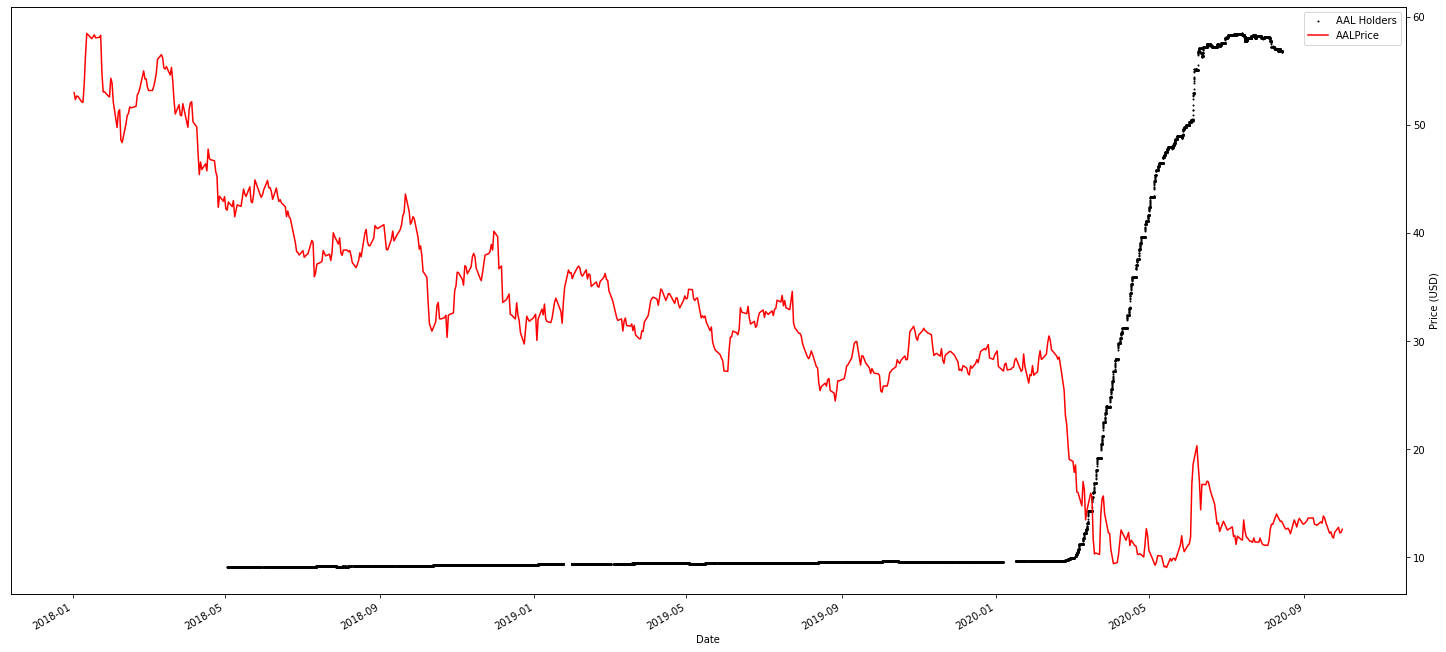

In [41]:
ax = rhdata.plot.scatter(x='timestamp', y='AAL', s=1, c='black', figsize=(25,12), label = 'AAL Holders')
AALstock.plot.line(secondary_y=True, x='Date', y='Close', c='red', label = 'AALPrice', mark_right=False, ax=ax)
ax.set_ylabel('Robinhood Holders')
ax.right_ax.set_ylabel('Price (USD)')


<AxesSubplot:>

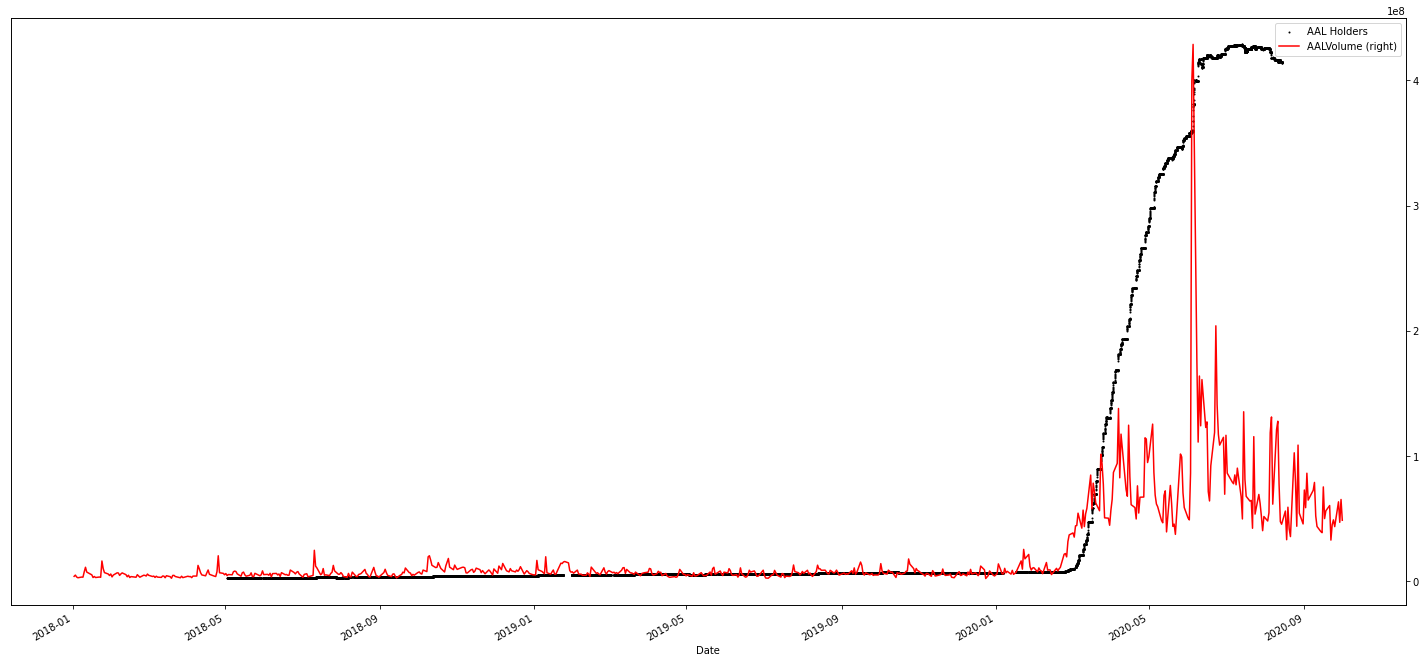

In [42]:
ax = rhdata.plot.scatter(x='timestamp', y='AAL', s=1,c='black', figsize=(25,12), label = 'AAL Holders')
AALstock.plot.line(secondary_y=True, x='Date', y='Volume', c='red', label = 'AALVolume', ax=ax)

## AAPL Analysis

<AxesSubplot:>

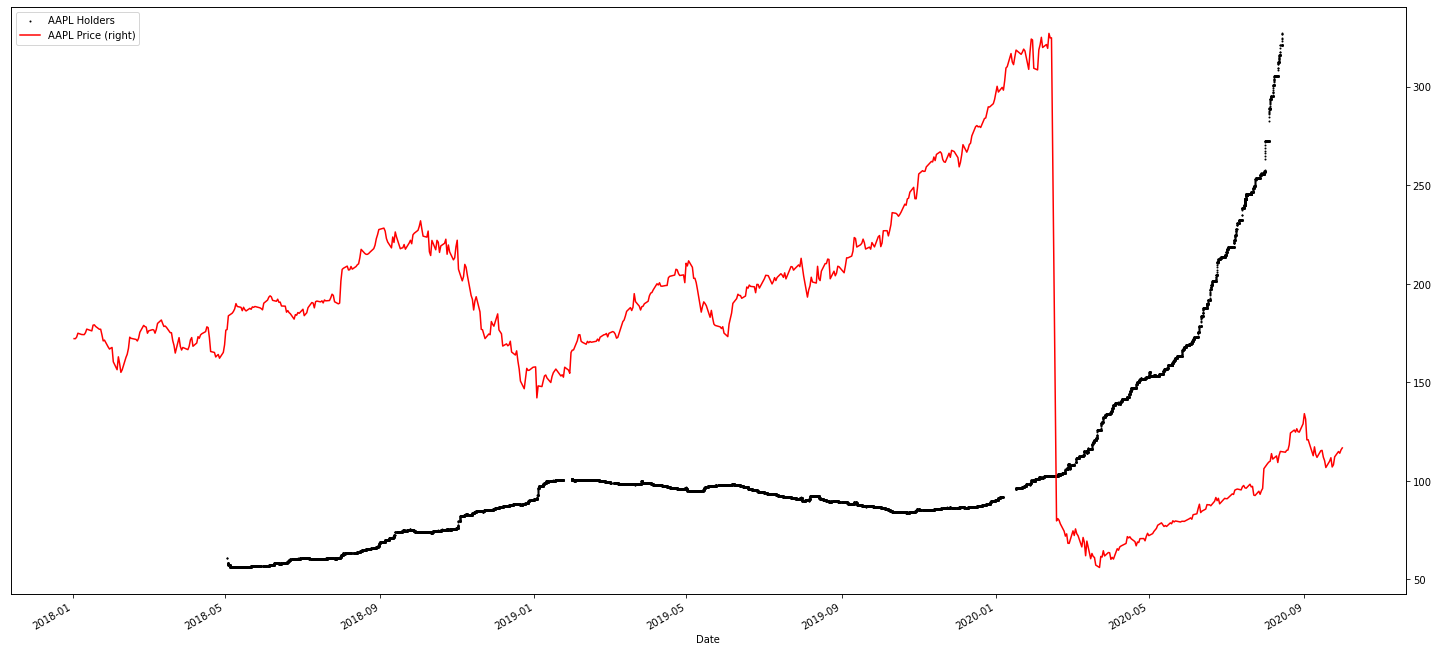

In [43]:
ax = rhdata.plot.scatter(x='timestamp', y='AAPL', s=1,c='black', figsize=(25,12), label = 'AAPL Holders')
AAPLstock.plot.line(secondary_y=True, x='Date', y='Close', c='red', label = 'AAPL Price', ax=ax)

<AxesSubplot:>

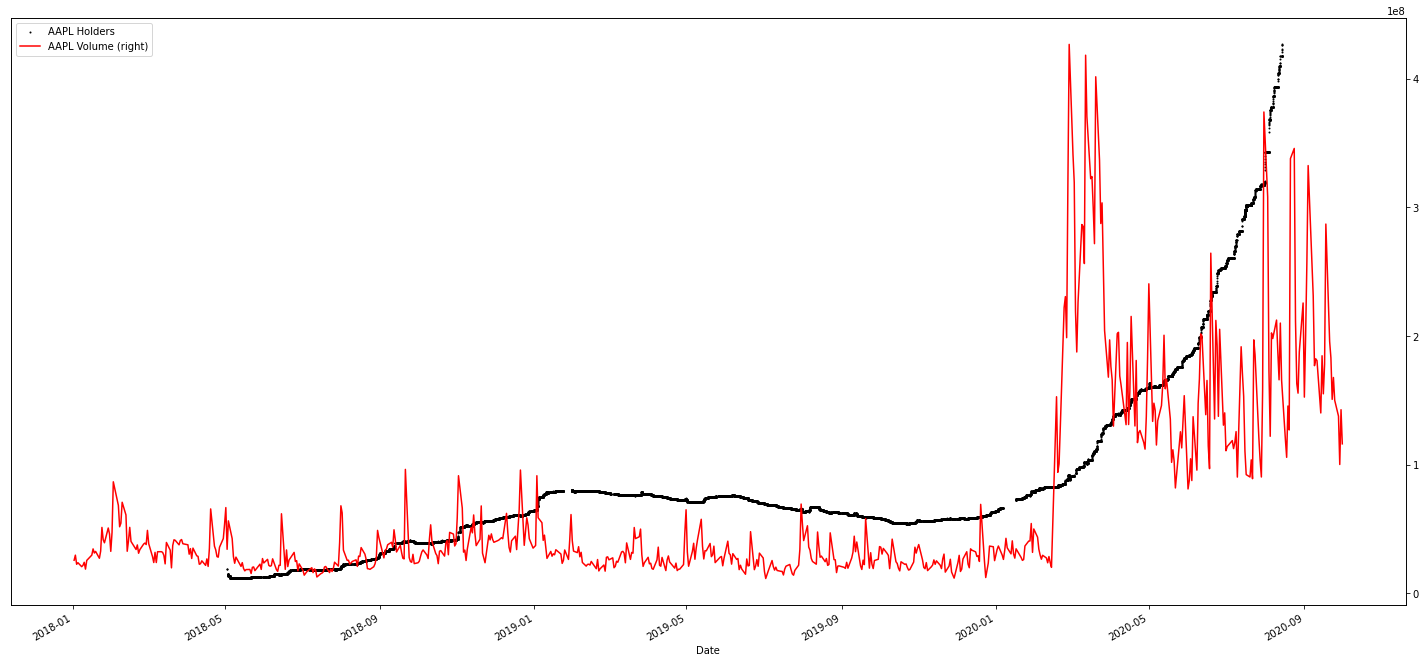

In [44]:
ax = rhdata.plot.scatter(x='timestamp', y='AAPL', s=1,c='black', figsize=(25,12), label = 'AAPL Holders')
AAPLstock.plot.line(secondary_y=True, x='Date', y='Volume', c='red', label = 'AAPL Volume', ax=ax)

### FB Analysis

<AxesSubplot:>

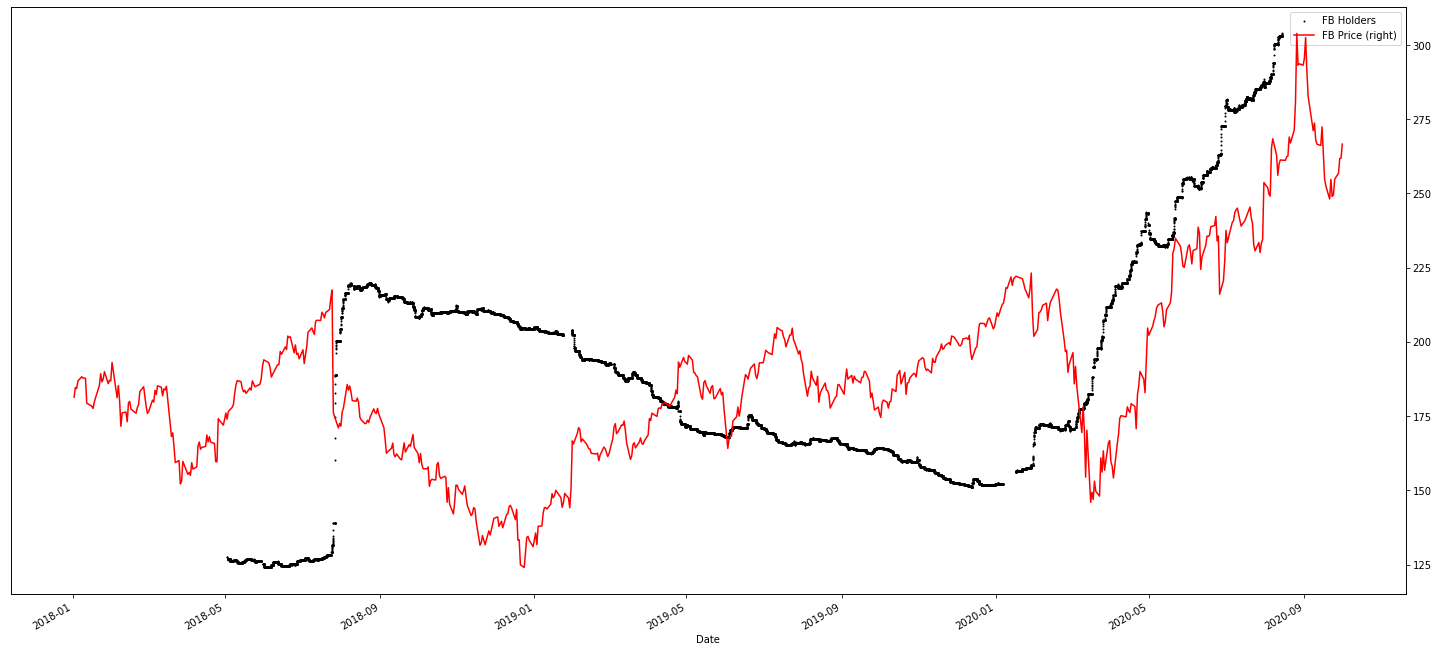

In [45]:
ax = rhdata.plot.scatter(x='timestamp', y='FB', s=1,c='black', figsize=(25,12), label = 'FB Holders')
FBstock.plot.line(secondary_y=True, x='Date', y='Close', c='red', label = 'FB Price', ax=ax)

<AxesSubplot:>

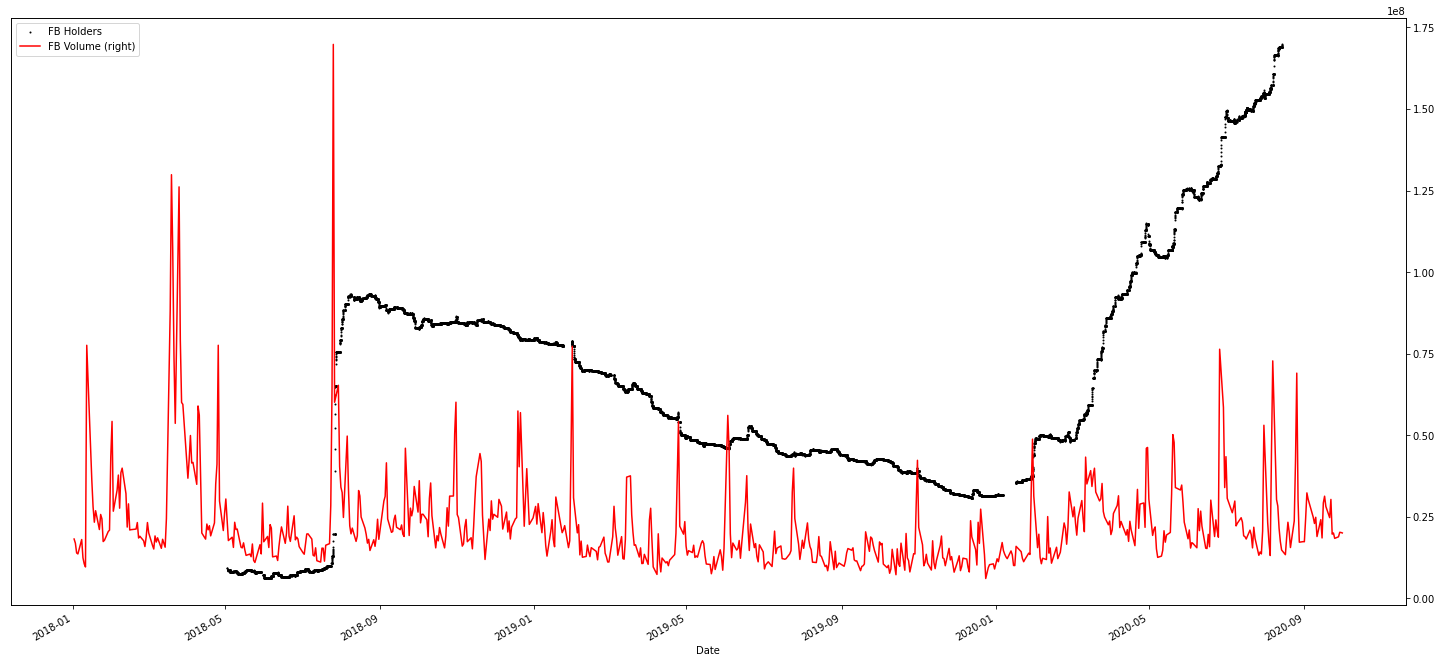

In [46]:
ax = rhdata.plot.scatter(x='timestamp', y='FB', s=1,c='black', figsize=(25,12), label = 'FB Holders')
FBstock.plot.line(secondary_y=True, x='Date', y='Volume', c='red', label = 'FB Volume', ax=ax)

### Google Analysis

<AxesSubplot:>

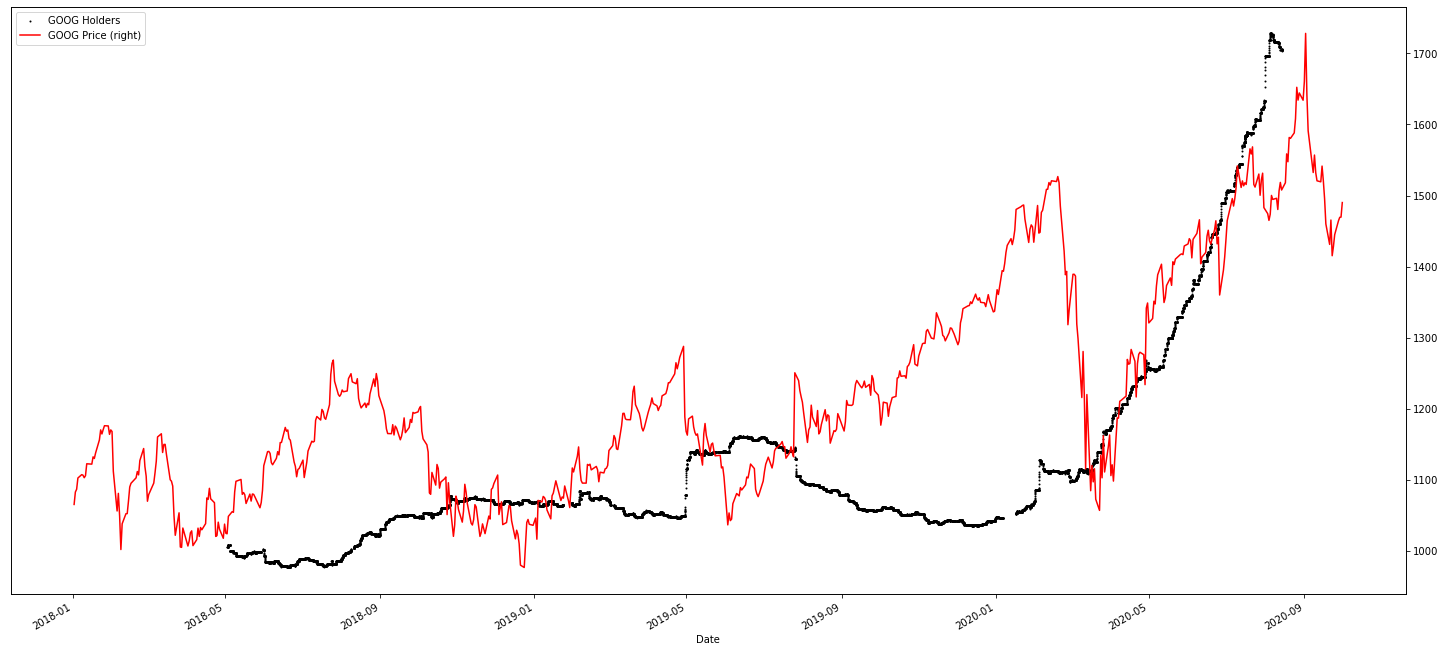

In [47]:
ax = rhdata.plot.scatter(x='timestamp', y='GOOG', s=1,c='black', figsize=(25,12), label = 'GOOG Holders')
GOOGstock.plot.line(secondary_y=True, x='Date', y='Close', c='red', label = 'GOOG Price', ax=ax)

<AxesSubplot:>

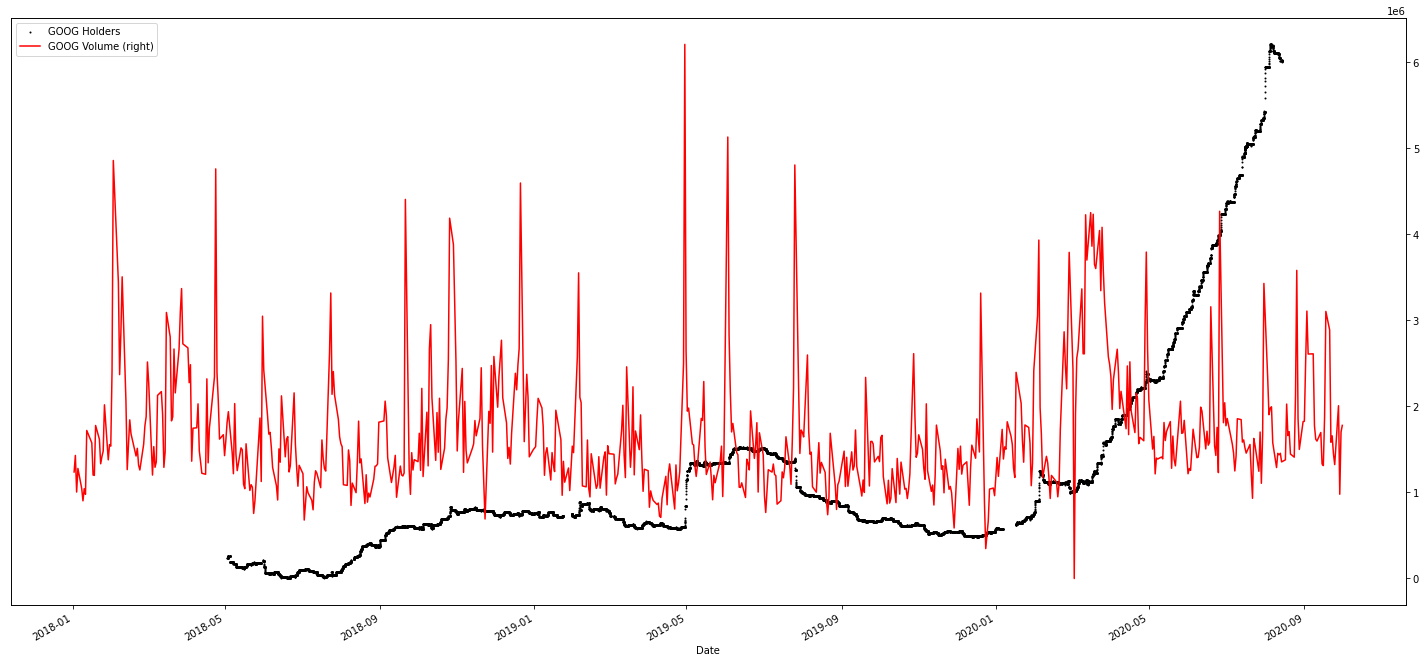

In [48]:
ax = rhdata.plot.scatter(x='timestamp', y='GOOG', s=1,c='black', figsize=(25,12), label = 'GOOG Holders')
GOOGstock.plot.line(secondary_y=True, x='Date', y='Volume', c='red', label = 'GOOG Volume', ax=ax)

### TSLA Analysis

<AxesSubplot:>

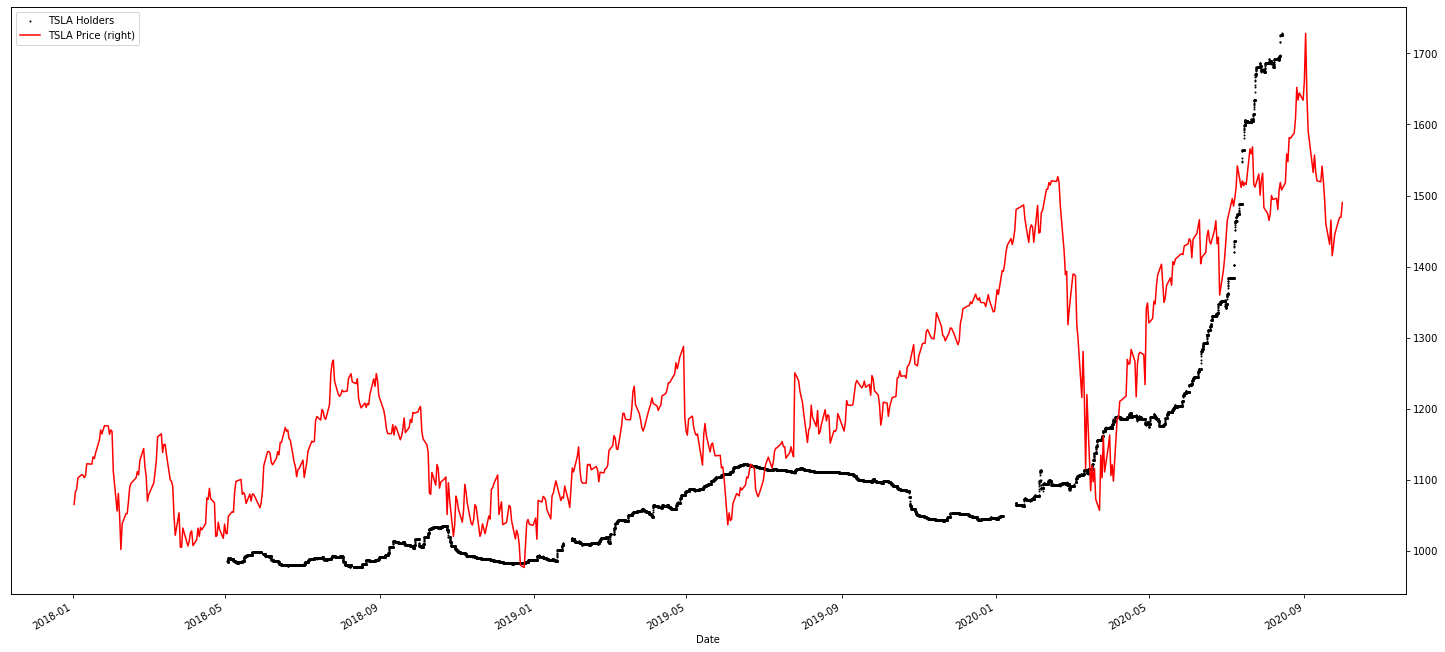

In [49]:
ax = rhdata.plot.scatter(x='timestamp', y='TSLA', s=1,c='black', figsize=(25,12), label = 'TSLA Holders')
GOOGstock.plot.line(secondary_y=True, x='Date', y='Close', c='red', label = 'TSLA Price', ax=ax)

<AxesSubplot:>

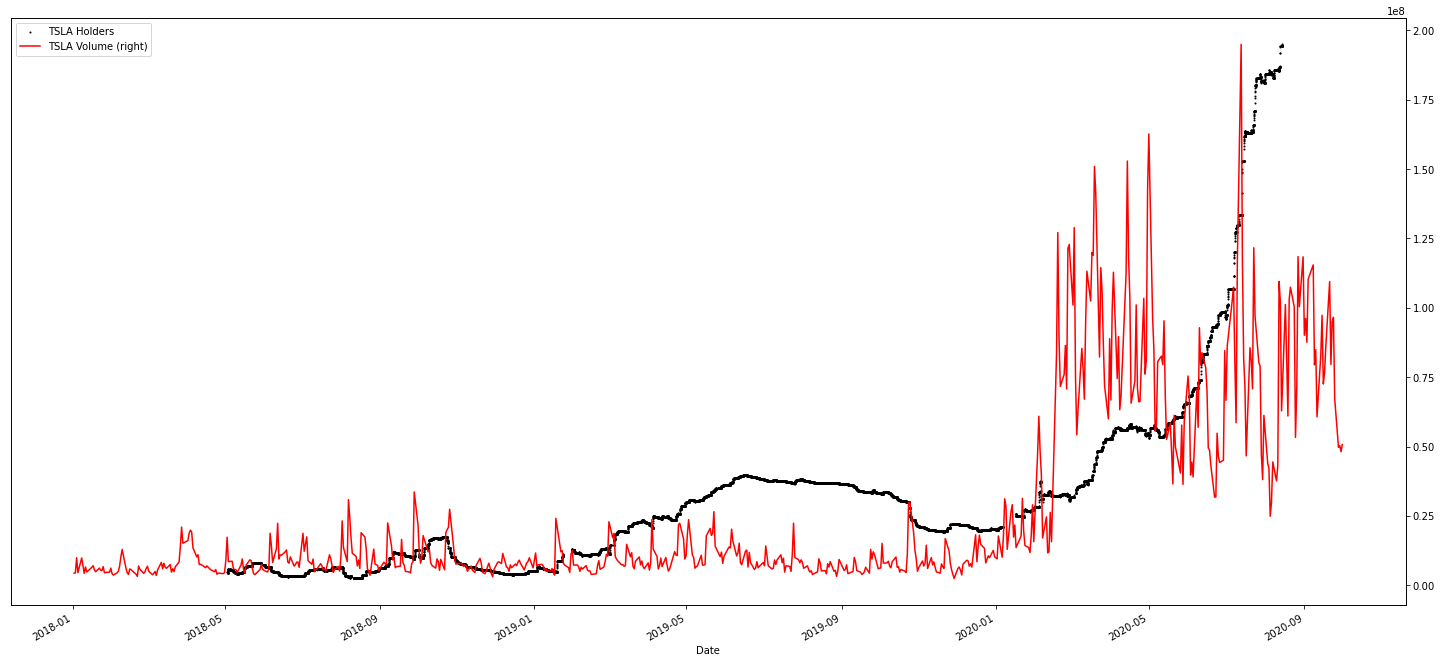

In [50]:
ax = rhdata.plot.scatter(x='timestamp', y='TSLA', s=1,c='black', figsize=(25,12), label = 'TSLA Holders')
TSLAstock.plot.line(secondary_y=True, x='Date', y='Volume', c='red', label = 'TSLA Volume', ax=ax)

# Next Steps:

We can use some calculus or area under the curve calculations and determine, roughly, what the average VWAP for robin hood users are. We can further explore, with some assumptions, how the average user is performing. If holders increases while the price is high and the price drops while holders continues to rise, we can assume that they're holding at a lower price than they bought in.

In the example of Tesla, we see as the price spikes, the number of robin hood users spikes accordingly and continues to rise after the sell-off. We can assume that anyone who bought in before in in the money, while all holders who bought in after, are holding unrealized losses.